# Question 1

[39.88861733 10.59083164 -4.16629844]
[25.55626461 -7.74472961  0.93101294]


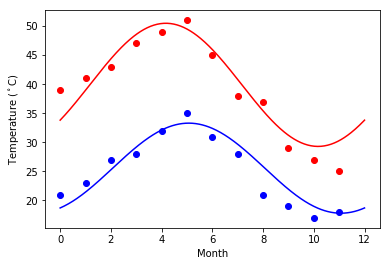

In [1]:
#Assignment 1

'''
Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
'''
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
months = np.arange(12)

#periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

#1. fitting it to the periodic function
res_max, cov_max = optimize.curve_fit(yearly_temps, months,Max)
res_min, cov_min = optimize.curve_fit(yearly_temps, months,Min)
print(res_max)
print(res_min)

#2. plot the fit
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months,Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months,Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

male 843
female 466


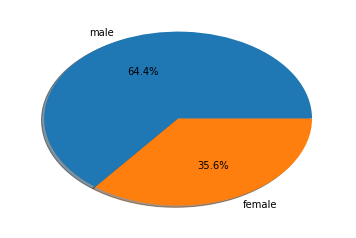

In [2]:
#Assignment 2


'''
This assignment is for visualization using matplotlib:
data to use:
url=
https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.cs
v
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
'''
import pandas as pd
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
#print(titanic.head())

#1. Create a pie chart presenting the male/female proportion

labels = ['male','female']
sizes = titanic.sex.value_counts()
print(labels[0],sizes[0])
print(labels[1],sizes[1])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
#ax1.axis('equal')
plt.show()


In [3]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

# Matplotlib plot

<Figure size 792x576 with 0 Axes>

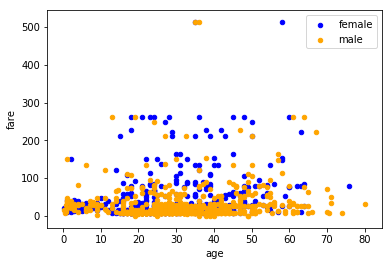

In [4]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
# plot twice on the same axes. 
#First we plot only the "female" data points, 
#then we plot only the corresponding "male" datapoints. 
#The trick is to use the ax keyword to the scatter method

plt.figure(figsize=(11,8))
ax = titanic[titanic.sex == 'female'].plot.scatter('age', 'fare', color='blue',label='female')
titanic[titanic.sex == 'male'].plot.scatter('age', 'fare', ax=ax, color='orange',label='male')

# Seaborn plot

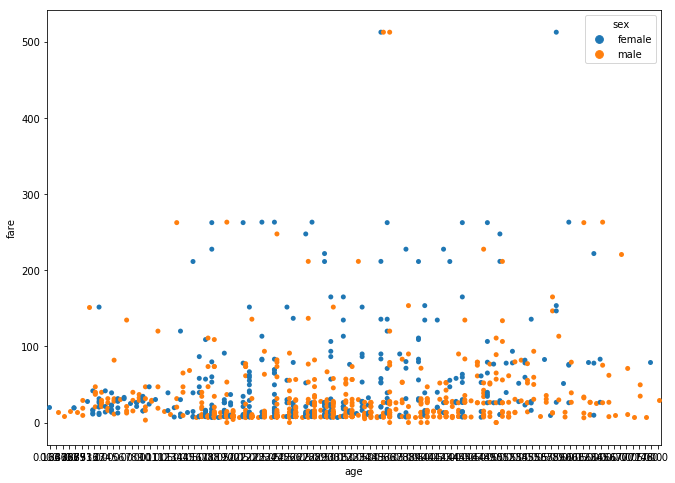

In [5]:
import seaborn as sns
plt.figure(figsize=(11,8))
sns.stripplot(x='age',y='fare',data=titanic,hue='sex',dodge=True)